### Grid Searching Decision Trees

### This try-it focuses on performing a grid search with a `DecisionTreeClassifier`.  As mentioned in the lectures, the grid search for a tree model can get large very easily. In addition to using `GridSearchCV`, scikitlearn implements additional tools that can save energy and offer alternatives to the brute force exhaustive search.  Below, you will compare the performance of some of these alternatives and discuss the time these searches take.  Note that this will be in large part determined by your personal computing power however the relative speed of the searches should be consistent.

In [340]:
import time
import pandas as pd
import seaborn as sns
import missingno as msno

from plotly.figure_factory import create_table
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
import warnings

warnings.filterwarnings("ignore")

### Data

In [341]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

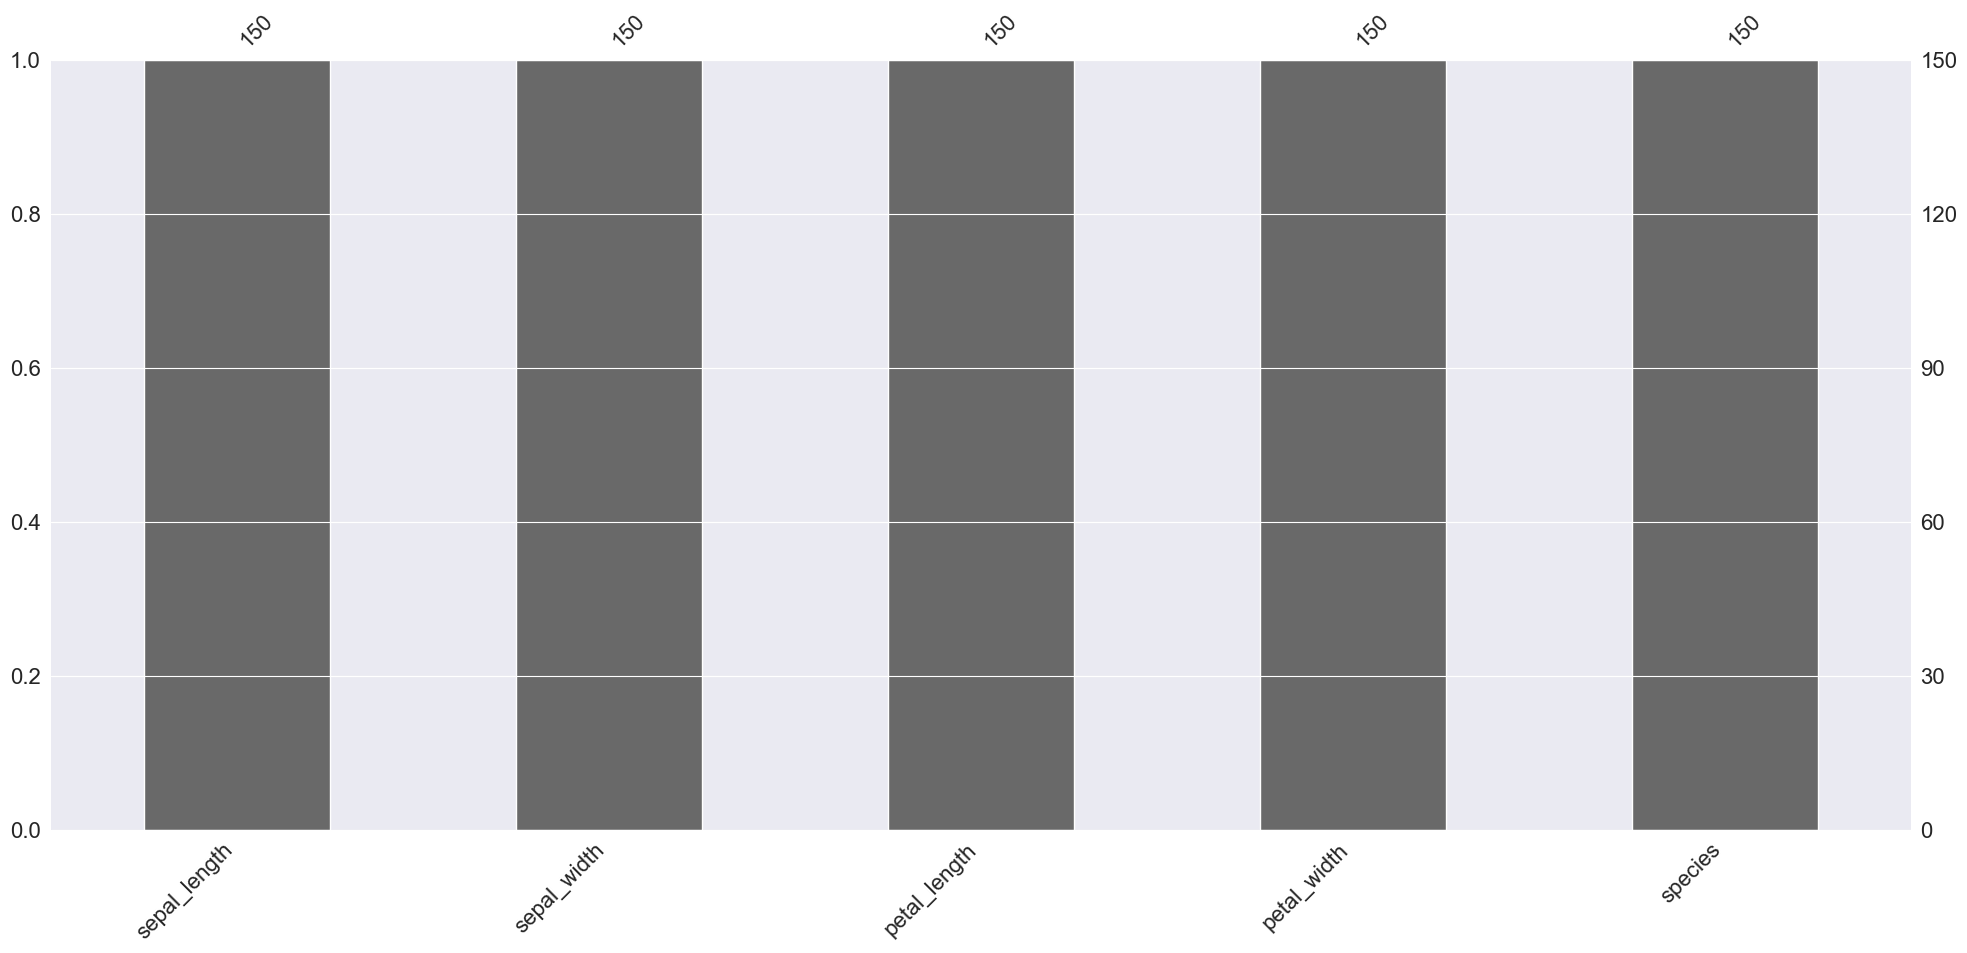

In [343]:
msno.bar(df)

In [344]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [345]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis = 1), df.species, random_state = 42)

In [346]:
params = {'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.5],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [0.1, 0.5, 1]
         }

### Comparing Grid Searches

### Below, explore the four grid search options using the same parameter selections for the `DecisionTreeClassifier`. All of the grid searching tools have a `.cv_results_` attribute after fitting that contains information after fitting including time.  Use this to compare the time of each search and discuss what you believe the "best" approach to identifying the hyperparameters of the model are between:

#### - `GridSearchCV`
#### - `RandomizedSearchCV`
#### - `HalvingGridSearchCV`
#### - `HalvingRandomSearchCV`

### Share your results in a plot comparing the different times for searching across the different parameters as well as the score of the different estimators that resulted from the grid search.  

### GridSearchCV

In [347]:
start = time.time()
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params)
grid.fit(X_train, y_train)
#grid_train_acc = grid.score(X_train, y_train)
#grid_test_acc = grid.score(X_test, y_test)
grid_train_acc = accuracy_score(y_train, grid.predict(X_train))
grid.fit(X_test, y_test)
grid_test_acc = accuracy_score(y_test, grid.predict(X_test))
best_params = grid.best_params_
end = time.time()
grid_time = end - start

### RandomizedSearchCV

In [348]:
start_randm = time.time()
randm = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), param_distributions=params)
randm.fit(X_train, y_train)
#randm_train_acc = randm.score(X_train, y_train)
#randm_test_acc = randm.score(X_test, y_test)
randm_train_acc = accuracy_score(y_train, randm.predict(X_train))
randm.fit(X_test, y_test)
randm_test_acc = accuracy_score(y_test, randm.predict(X_test))
randm_best_params = randm.best_params_
end_randm = time.time()
randm_time = end_randm - start_randm

### HalvingGridSearchCV

In [349]:
start_search = time.time()
search = HalvingGridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params)
search.fit(X_train, y_train)
#search_train_acc = search.score(X_train, y_train)
#search_test_acc = search.score(X_test, y_test)
search_train_acc = accuracy_score(y_train, search.predict(X_train))
search.fit(X_test, y_test)
search_test_acc = accuracy_score(y_test, search.predict(X_test))
search_best_params = search.best_params_
end_search = time.time()
search_time = end_search - start_search

### HalvingRandomSearchCV

In [350]:
start_rsearch = time.time()
rsearch = HalvingRandomSearchCV(DecisionTreeClassifier(random_state = 42), param_distributions=params)
rsearch.fit(X_train, y_train)
#rsearch_train_acc = rsearch.score(X_train, y_train)
#rsearch_test_acc = rsearch.score(X_test, y_test)
rsearch_train_acc = accuracy_score(y_train, rsearch.predict(X_train))
rsearch.fit(X_test, y_test)
rsearch_test_acc = accuracy_score(y_test, rsearch.predict(X_test))
rsearch_best_params = rsearch.best_params_
end_rsearch = time.time()
rsearch_time = end_rsearch - start_rsearch

In [351]:
models = ['GridSearchCV','RandomizedSearchCV','HalvingGridSearchCV','HalvingRandomSearchCV']
min_samples_split = [best_params['min_samples_split'], randm_best_params['min_samples_split'], search_best_params['min_samples_split'], rsearch_best_params['min_samples_split']]
max_depth = [best_params['max_depth'], randm_best_params['max_depth'], search_best_params['max_depth'], rsearch_best_params['max_depth']]
min_samples_leaf = [best_params['min_samples_leaf'], randm_best_params['min_samples_leaf'], search_best_params['min_samples_leaf'], rsearch_best_params['min_samples_leaf']]
criterion = [best_params['criterion'], randm_best_params['criterion'], search_best_params['criterion'], rsearch_best_params['criterion']]
test_acc = [grid_test_acc, randm_test_acc, search_test_acc, rsearch_test_acc]
train_acc = [grid_train_acc, randm_train_acc, search_train_acc, rsearch_train_acc]
execute_time = [grid_time, randm_time, search_time, rsearch_time]
model_metrics = {'models': models, 'min_samples_split': min_samples_split, 'max_depth': max_depth, 'min_samples_leaf':min_samples_leaf, 'criterion': criterion, 'test_accuracy': test_acc, 'train_accuracy': train_acc, 'runtime': execute_time}
df_metrics = pd.DataFrame(model_metrics)
df_metrics.set_index('models', inplace=True)
df_metrics

,min_samples_split,max_depth,min_samples_leaf,criterion,test_accuracy,train_accuracy,runtime
models,,,,,,,
GridSearchCV,0.1,2,0.1,gini,1.000000,0.955357,1.257352
RandomizedSearchCV,0.5,5,1.0,entropy,1.000000,0.955357,0.206503
HalvingGridSearchCV,0.1,2,0.1,gini,1.000000,0.946429,1.710250
HalvingRandomSearchCV,0.2,5,0.5,gini,0.710526,0.946429,0.083000


In [352]:
create_table(df_metrics.sort_values(ascending=False, by=['train_accuracy']),index_title='Models',index=True)